# Machine Learning  API's with FastAPI

## Business Understanding

### Hypothesis

Null Hypothesis(Ho): Older patients (age 60 and above) are less likely to develop sepsis compared to younger patients (below 60 years)

Alternate Hypothesis(Ha): Older patients (age 60 and above) are more likely to develop sepsis compared to younger patients (below 60 years)

### Analytical Questions
1. Is there a relationship between body mass index (M11) and the development of sepsis?
 
2. Are there noticeable differences in blood pressure (PR) readings between sepsis-positive and sepsis-negative patients?
 
3. How do plasma glucose levels (PRG) differ between patients who develop sepsis and those who do not?

## Data Understanding

### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepsis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |


#### Importations

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu

In [4]:
# Load train dataset
train_df = pd.read_csv("Data/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Exploratory Data Analysis (EDA)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [15]:
# Rename sepsis coloumn
train_df.rename(columns= {'Sepssis':'Sepsis'}, inplace=True)

In [16]:
train_df.isna().sum()


ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

In [17]:
train_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [10]:
train_df.duplicated().sum()

np.int64(0)

### Univariate Analysis

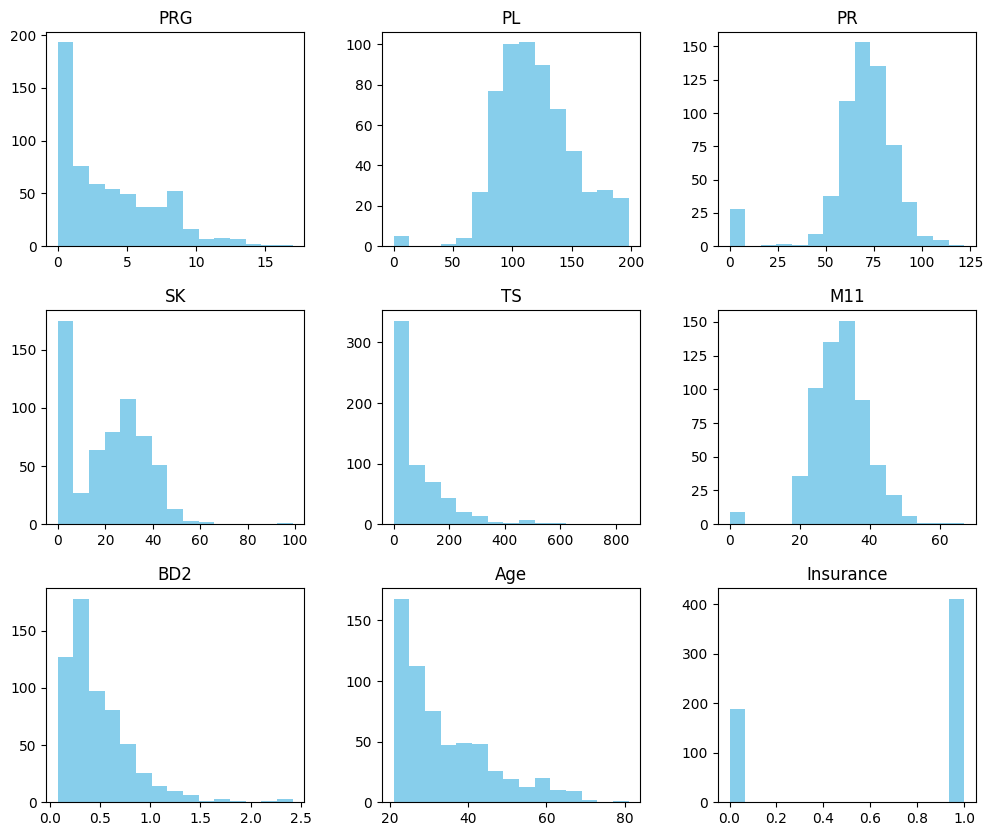

In [13]:
# Histogram showing the distribution of numeric features
train_df.hist(figsize=(12,10), color='skyblue', grid =False , bins =15)
plt.show()

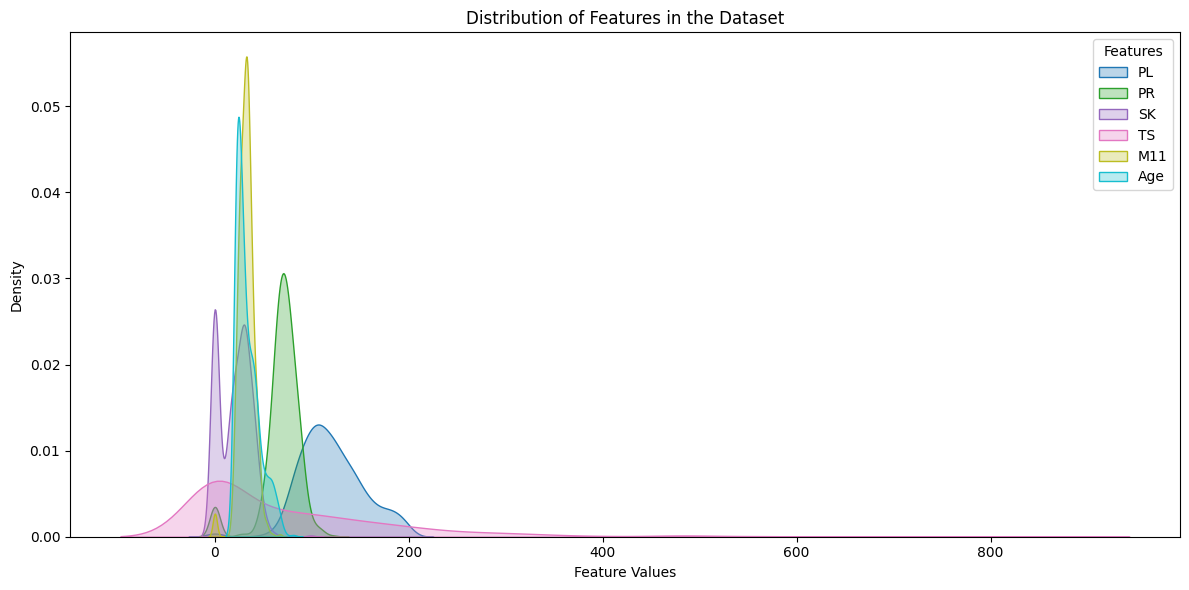

In [26]:
cols_to_plot = train_df.drop(['ID','BD2', 'PRG', 'Insurance', 'Sepsis'], axis=1).columns
plt.figure(figsize=(12,6))

# Create a colormap object for assigning different colors
 
cmap = plt.get_cmap('tab10')
num_colors = len(cols_to_plot)
 
for i, col in enumerate(cols_to_plot):

    #Generate color based on index and number of colors 
    color = cmap(i / (num_colors - 1))

    #Create the KDE plot for each feature on top of the histogram 
    sns.kdeplot(train_df[col], fill=True, color = color, alpha=0.3, label=col)
 
# Adjust plot elements
 
plt.xlabel('Feature Values') 
plt.ylabel('Density')
plt.title('Distribution of Features in the Dataset') 
plt.legend(title='Features') 
plt.tight_layout()
 
plt.show()

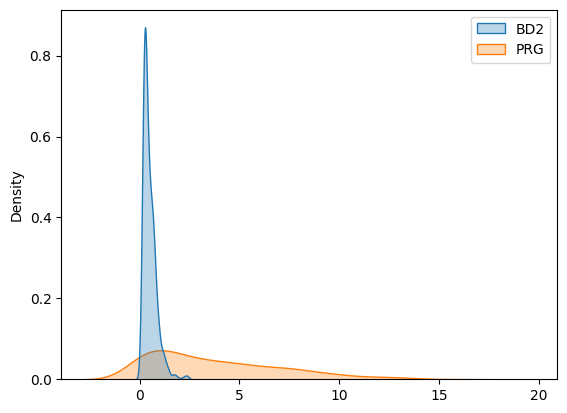

In [28]:
col = train_df[['BD2', 'PRG']]
sns.kdeplot(col, fill=True, color=color, alpha=0.3, label=col)
plt.show()

In [30]:
# sns.kdeplot(train_df.drop('Sepsis', axis=1).values.ravel())

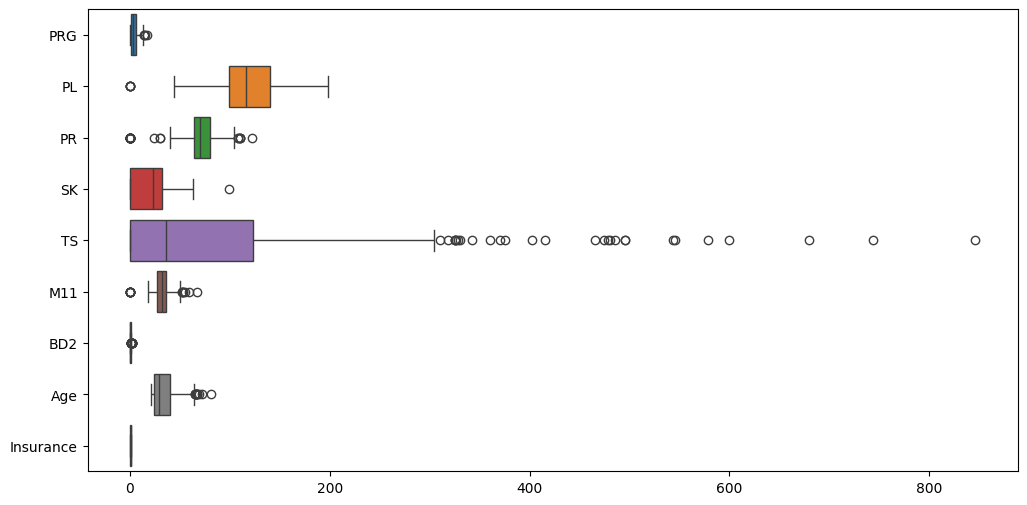

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df.drop(['ID', 'Sepsis'], axis=1), orient='h')
plt.show()

### Bivariate Analysis

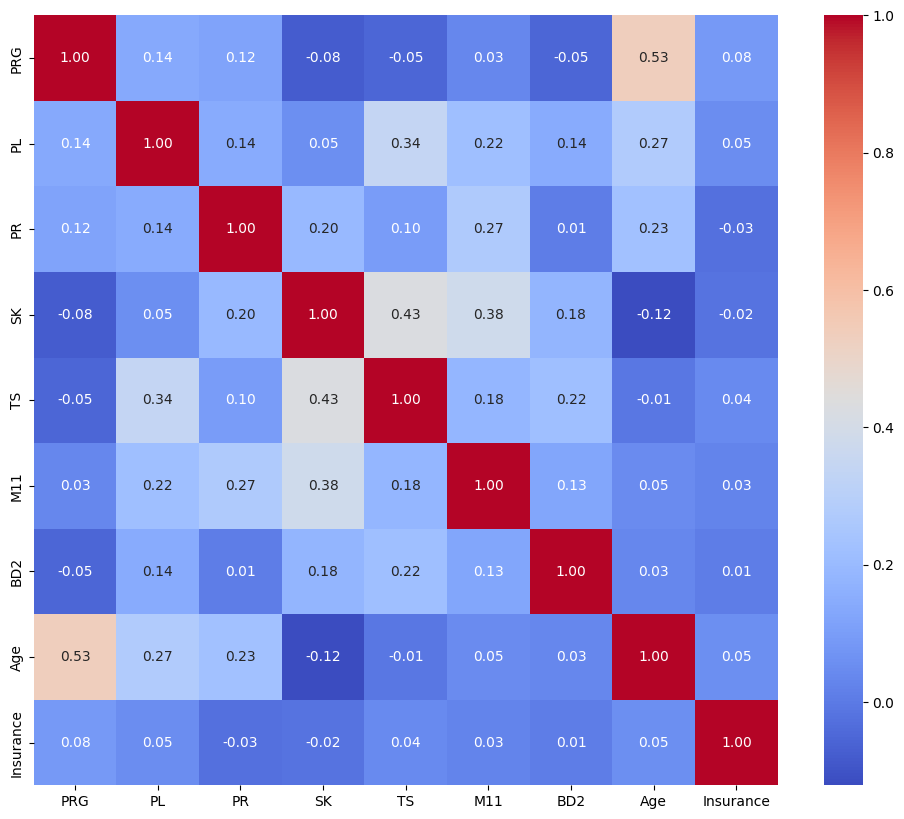

In [37]:
numeric_features = train_df.select_dtypes('number').columns
cor = train_df[numeric_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

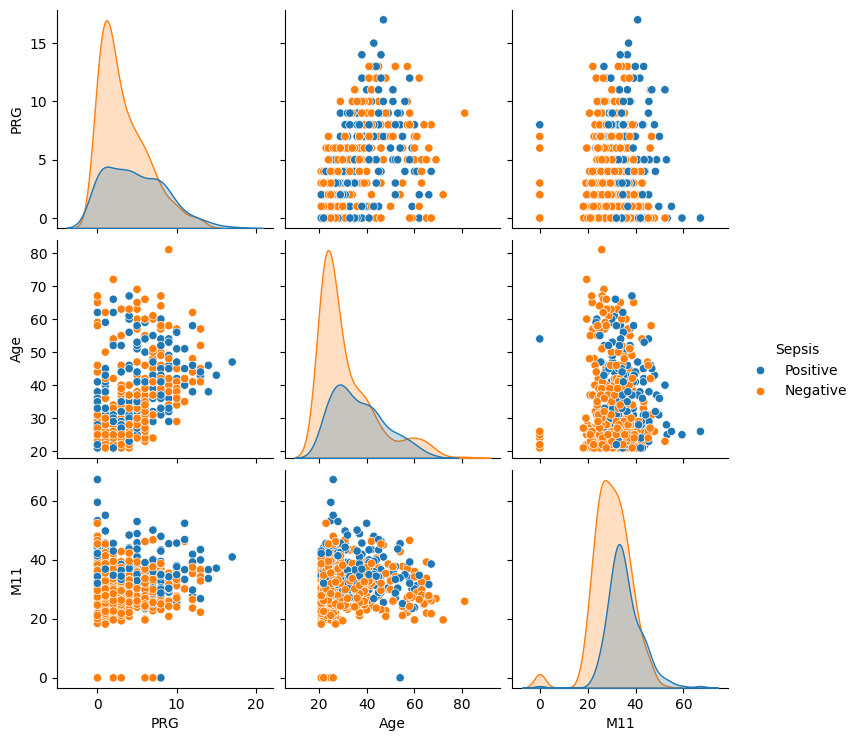

In [38]:
cols_to_use = train_df[['PRG', 'Age', 'M11', 'Sepsis']]
sns.pairplot(cols_to_use, hue='Sepsis')
plt.show()

### Multivariate Analysis

#### **Hypothesis**

In [41]:
train_df['Age'] = train_df['Age'].apply(lambda x: '60 and above' if x >= 60 else 'below 60')
 
contingency_table = pd.crosstab(train_df['Age'], train_df['Sepsis']) 

print(contingency_table)
  
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table) 
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

Sepsis        Negative  Positive
Age                             
60 and above        20         7
below 60           371       201
Chi-square statistic: 0.601967563891041
p-value: 0.43782829453541183


In [42]:
if p < 0.05:     
       print("We reject the Null Hypothesis: There is a significant association between age group and sepsis outcome.")
else:     
     print("There is no significant association between age group and sepsis outcome.")

There is no significant association between age group and sepsis outcome.


### **Answering Analytical Questions**

QN 1. Is there a relationship between body mass index (M11) and the development of sepsis?

          count       mean       std  min     25%   50%     75%   max
Sepsis                                                               
Negative  391.0  30.076471  7.812732  0.0  25.200  29.9  35.050  52.3
Positive  208.0  35.385577  7.195898  0.0  30.975  34.3  39.025  67.1


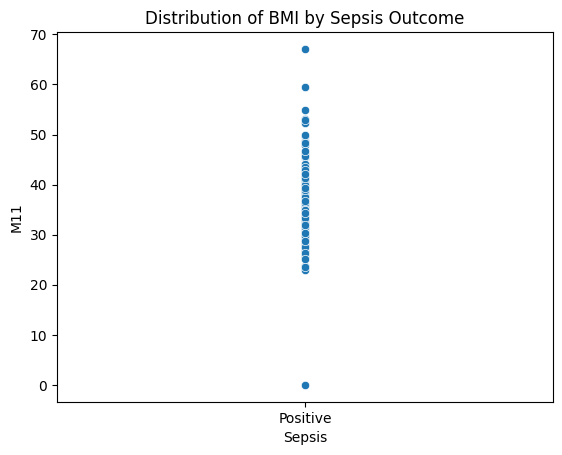

In [45]:
# Summary statistics
print(train_df.groupby('Sepsis')['M11'].describe()) 
# Boxplot
sns.scatterplot(x='Sepsis', y='M11', data=train_df[train_df['Sepsis']=='Positive']) 
plt.title('Distribution of BMI by Sepsis Outcome') 
plt.show()

QN 2. Are there noticeable differences in blood pressure (PR) readings between sepsis-positive and sepsis-negative patients?

          count       mean        std  min   25%   50%   75%    max
Sepsis                                                             
Negative  391.0  67.872123  17.917733  0.0  62.0  70.0  78.0  122.0
Positive  208.0  70.350962  21.706360  0.0  66.0  74.0  82.0  110.0


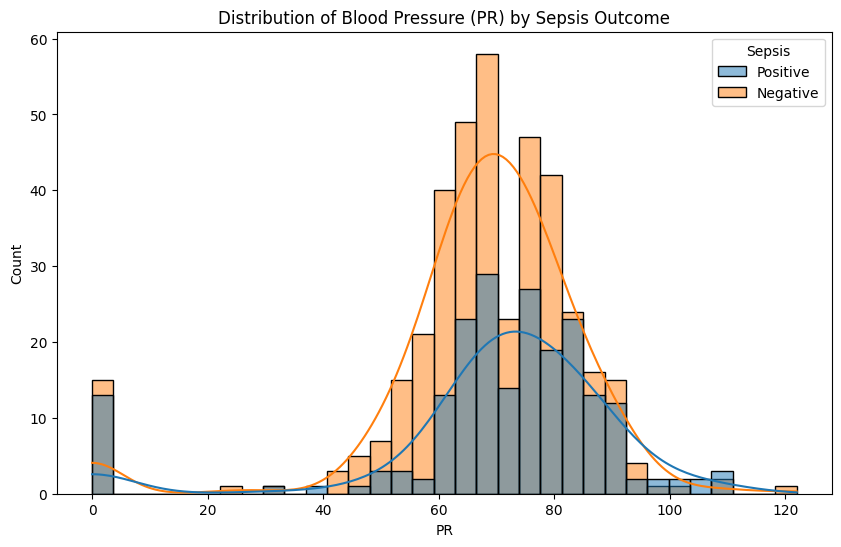

Mann-Whitney U test p-value: 0.0005014049708706393
There are noticeable differences in Blood Pressure(PR) readings between sepsis-positive and sepsis-negative patients


In [49]:
# Calculate summary statistics
summary_stats = train_df.groupby('Sepsis')['PR'].describe()
print(summary_stats)
 
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='PR', hue='Sepsis', kde=True) 
plt.title('Distribution of Blood Pressure (PR) by Sepsis Outcome')
plt.show()
  
# Extract PR values for each group
sepsis_positive = train_df[train_df['Sepsis'] == 'Positive']['PR']
sepsis_negative = train_df[train_df['Sepsis'] == 'Negative']['PR']
 
u_stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)
print(f"Mann-Whitney U test p-value: {p_value}")

if p < 0.05:     
       print("There are no noticeable differences in Blood Pressure(PR) readings between sepsis-positive and sepsis-negative patients")
else:     
     print("There are noticeable differences in Blood Pressure(PR) readings between sepsis-positive and sepsis-negative patients")
 

Qn 3. How do plasma glucose levels (PRG) differ between patients who develop sepsis and those who do not?

          count      mean       std  min   25%  50%  75%   max
Sepsis                                                        
Negative  391.0  3.317136  3.018182  0.0  1.00  2.0  5.0  13.0
Positive  208.0  4.778846  3.755722  0.0  1.75  4.0  8.0  17.0


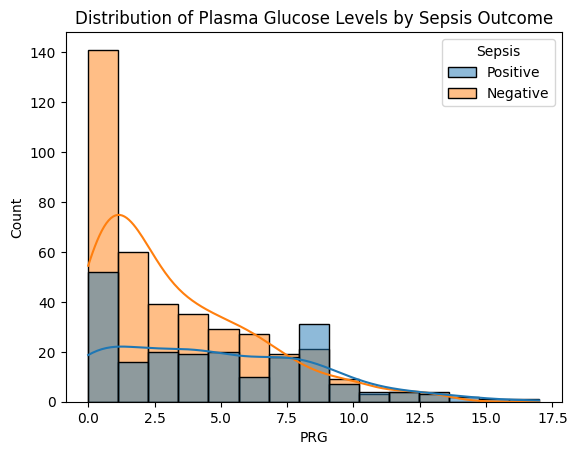

Mann-Whitney U test p-value: 7.517335229649623e-06


In [50]:
# Summary statistics
print(train_df.groupby('Sepsis')['PRG'].describe())
 
# Histogram
sns.histplot(data=train_df, x='PRG', hue='Sepsis', kde=True)
plt.title('Distribution of Plasma Glucose Levels by Sepsis Outcome')
plt.show()
 
sepsis_positive_prg = train_df[train_df['Sepsis'] == 'Positive']['PRG']
sepsis_negative_prg = train_df[train_df['Sepsis'] == 'Negative']['PRG']
 
u_stat, p_value = mannwhitneyu(sepsis_positive_prg, sepsis_negative_prg)
print(f"Mann-Whitney U test p-value: {p_value}")

if p < 0.05:     
       print("There are no noticeable differences in Blood Pressure(PR) readings between sepsis-positive and sepsis-negative patients")
else:     
     print("There are noticeable differences in Blood Pressure(PR) readings between sepsis-positive and sepsis-negative patients")

### Key Insights
1. The minimum age is 21 and the maximum age is 81
2. There are no missing values in the data set
3. The dataset conatins many outliers

## Data Preparation

Checking the dataset to find out if it is balanced

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    object 
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 51.6+ KB


In [52]:
sepsis_dist = train_df['Sepsis'].value_counts().rename('total').reset_index()
sepsis_dist

,Sepsis,total
0,Negative,391
1,Positive,208


In [53]:
sepsis_dist['ratio'] = sepsis_dist['total'].apply(lambda X: round(X/sepsis_dist['total'].sum()*100),2)
sepsis_dist

C:\Users\dell\AppData\Local\Temp\ipykernel_9248\439501803.py:1: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



,Sepsis,total,ratio
0,Negative,391,65
1,Positive,208,35


In [55]:
# Dropping the ID column since we will not need it for modelling
train_df.drop('ID', axis=1, inplace=True)

Splitting the dataset into Training and Testing data
- X = Input variables
- y = Target variables

## Modeling and Evaluation

## Deployment